# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "./Resources/city_data.csv"
ride_data_to_load = "./Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
type_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
type_ride_count.name = "Total Rides"
type_ride_count.head()

type
Rural        125
Suburban     625
Urban       1625
Name: Total Rides, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
type_driver_sum = pyber_data_df.groupby(["type"]).sum()["driver_count"]
type_driver_sum.name = "Total Drivers"
type_driver_sum.head()

type
Rural         537
Suburban     8570
Urban       59602
Name: Total Drivers, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
type_fare_sum = pyber_data_df.groupby(["type"]).sum()["fare"]
type_fare_sum.name = "Total Fares"
type_fare_sum.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: Total Fares, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
type_fare_avg = pyber_data_df.groupby(["type"]).mean()["fare"]
type_fare_avg.name = "Average Fare per Ride"
type_fare_avg.head()

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: Average Fare per Ride, dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type
driver_city_avg = pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df.groupby(["type"]).sum()["driver_count"]
driver_city_avg.name = "Average Fare per Driver"
driver_city_avg.head()


type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
Name: Average Fare per Driver, dtype: float64

In [17]:
#  6. Create a PyBer summary DataFrame. 
#type_ride_count
#type_driver_sum
#type_fare_sum
#type_fare_avg
#driver_city_avg

pyber_summary_df = pd.merge(type_ride_count, type_driver_sum, on="type", how="outer") 
pyber_summary_df = pd.merge(pyber_summary_df, type_fare_sum, on="type", how="outer")
pyber_summary_df = pd.merge(pyber_summary_df, type_fare_avg, on="type", how="outer")
pyber_summary_df = pd.merge(pyber_summary_df, driver_city_avg, on="type", how="outer")
pyber_summary_df

#pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,537,4327.93,34.623440,8.059460
Suburban,625,8570,19356.33,30.970128,2.258615
Urban,1625,59602,39854.38,24.525772,0.668675


In [18]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [19]:
#  8. Format the columns.
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,8570,"$19,356.33",$30.97,$2.26
Urban,1625,59602,"$39,854.38",$24.53,$0.67


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [20]:
# 1. Read the merged DataFrame
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,8570,"$19,356.33",$30.97,$2.26
Urban,1625,59602,"$39,854.38",$24.53,$0.67


In [21]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
agg_ride_data_df = pyber_data_df[["city", "date","fare","type"]]
agg_ride_data_sum_df = agg_ride_data_df.groupby(["city","date"]).sum()["fare"] 
agg_ride_data_sum_df

city          date               
Amandaburgh   2019-01-02 09:57:04    33.06
              2019-01-11 02:22:07    29.24
              2019-01-13 16:04:10    23.35
              2019-01-21 04:12:54     9.26
              2019-01-29 23:28:12    41.06
                                     ...  
Williamsview  2019-04-15 16:09:08    44.74
              2019-04-16 08:23:02    20.38
              2019-04-18 02:07:15    39.79
              2019-04-26 00:30:10    20.89
              2019-05-04 14:56:45    32.80
Name: fare, Length: 2375, dtype: float64

In [22]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
agg_ride_data_sum_df = agg_ride_data_sum_df.reset_index()
agg_ride_data_sum_df

,city,date,fare
0,Amandaburgh,2019-01-02 09:57:04,33.06
1,Amandaburgh,2019-01-11 02:22:07,29.24
2,Amandaburgh,2019-01-13 16:04:10,23.35
3,Amandaburgh,2019-01-21 04:12:54,9.26
4,Amandaburgh,2019-01-29 23:28:12,41.06
...,...,...,...
2370,Williamsview,2019-04-15 16:09:08,44.74
2371,Williamsview,2019-04-16 08:23:02,20.38
2372,Williamsview,2019-04-18 02:07:15,39.79
2373,Williamsview,2019-04-26 00:30:10,20.89


In [23]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
agg_ride_data_df.pivot(index='date', columns='type', values='fare')

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [24]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
pivot_ride_data_df = agg_ride_data_df.pivot(index='date', columns='type', values='fare')
pivot_ride_data_df = pivot_ride_data_df.loc['2019-01-01':'2019-04-29']
pivot_ride_data_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [25]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
pivot_ride_data_df.index = pd.to_datetime(pivot_ride_data_df.index)

In [26]:
# 7. Check that the datatype for the index is datetime using df.info()
pivot_ride_data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [27]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
ride_data_resampled = pivot_ride_data_df.resample('W').sum()
ride_data_resampled

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


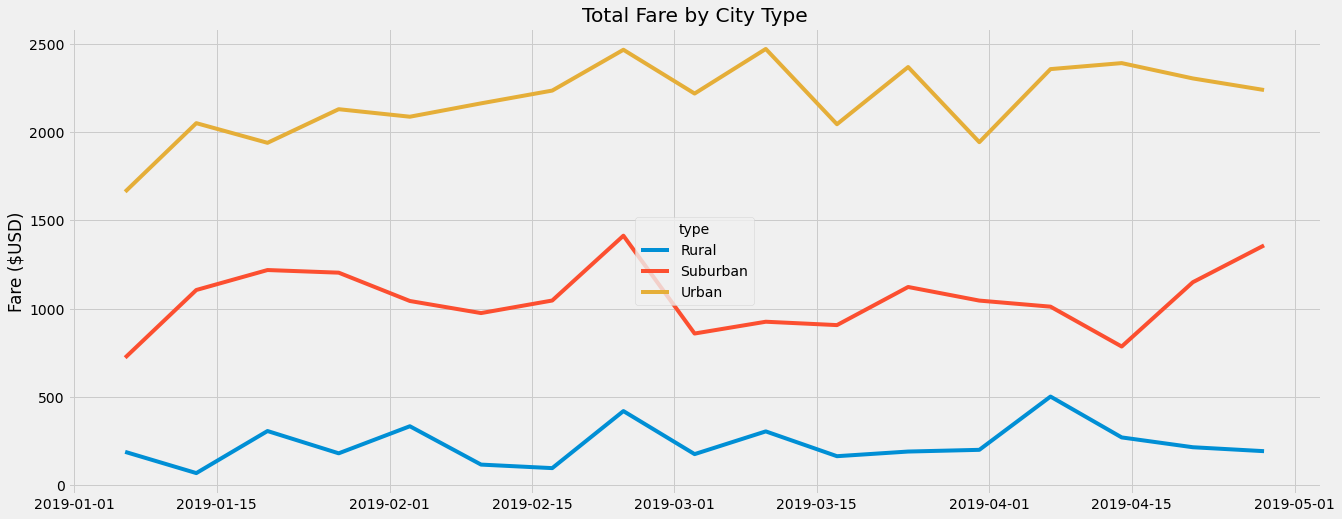

<Figure size 432x288 with 0 Axes>

In [28]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style


# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

plt.style.use('fivethirtyeight')

x = ride_data_resampled.index
y = ride_data_resampled.values

fig, ax = plt.subplots(figsize=(20, 8))

#figsize=(20,8),
#kind='line', 
#title='Weekly Stocks',
#legend=False,
#xlabel='Week',
#ylabel='Stock'


ax.plot(x, y)
ax.legend(ride_data_resampled.columns, loc='center', title='type')
ax.set_ylabel('Fare ($USD)')
ax.set_title("Total Fare by City Type")
plt.show()

plt.savefig("./Analysis/PyBer_fare_summary.png")
